# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

import numpy as np

# Importing libraries for data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor



# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor


# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler


### Loading the dataset

In [3]:
# calling the dataset
Boston_df = pd.read_csv("Boston.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# Checking the first 20 rows of the dataset
Boston_df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [5]:
# Understand the shape of the data
Boston_df.shape

(506, 13)

In [6]:
# Extracting basic info about the dataframe.
Boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
# checking if the data has null values present.
Boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Checking the Dataframe for duplicate values in each column.
list_columns = Boston_df.columns

for column in list_columns:
    number_of_duplicates = Boston_df[column].duplicated().sum()
    print(f'Number of duplicates in column {column}: {number_of_duplicates}')

Number of duplicates in column CRIM: 2
Number of duplicates in column ZN: 480
Number of duplicates in column INDUS: 430
Number of duplicates in column CHAS: 504
Number of duplicates in column NOX: 425
Number of duplicates in column RM: 60
Number of duplicates in column AGE: 150
Number of duplicates in column DIS: 94
Number of duplicates in column RAD: 497
Number of duplicates in column TAX: 440
Number of duplicates in column PTRATIO: 460
Number of duplicates in column LSTAT: 51
Number of duplicates in column MEDV: 277


In [9]:
# Checking summary statistics
Boston_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [10]:
# Checking the count of unique values in each column
Boston_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?

**Answer:** the distribution of what will be our dependent variable "MEDV" is slightly skewed, with a value of 1.11, and appears to be Multimodal in it's distribution ever so slightly due to the spike in extreme high values.

2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?

**Answer:** The correlation with the dependet variable and the independent variables tend to be negative, which makes sense given the nature of the dataset and the overwhelming majority of attributes that will negatively contribute to the value of "MEDV".

3. What are all the inferences that can be found by doing univariate analysis for different variables?

**Answer:** 

A univriate analysis of "CRIM" show mainly that the vast majority of datapoints have low per capita crime rate in it's corresponding town or suburb.

"ZN" has a vast number of zeroes, therefore we can infer that it will be a relevant feature in the model due to the scarcity of land.

"INDUS" variable offers a proportion of non-retail business acres per town, with an average of 11% and a maximum of 27.7%. A standard deviation of 6 shows a high variance and therefore a significant amount of zones with very small non-retail business areas and some upwards of 20%. It shows also a large mode of about 18% with over 120 datapoints.

"CHAS" shows a simple variable indicating proximity to the Charles river. We expect a high correlation with "MEDV".

"NOX" a fairly uniformly distributed, or bi-modal variable, showing a concentration of NOX per town  that varies from low concentrations to high concentrations, with jumps of nearly 10 points, which could indicate a proximity to industrial zones.

"RM" the number of rooms per dwelling gives us the most normally distributed data of the set, with a mean of 6. 

"AGE" and "DIS" are negatively correlated, as we can visualize in the boxplots below, and so, we can infer that as the distance to the five Boston employment centers diminishes, the average proportion of houses built before 1940 rises. Given that in general, older houses tend to exist in a larger proportin near big urban areas, this is a very obvious correlation between the two variables. Something to be confirmed during bi variate analysis.

"RAD" most values fall between a wheighted distance of about 3 to 6 of the employment centers. A jump in the data can be observed where a distance of about 23 is present. This might indicate that the data was gathered in specific distances in large clusters.

"TAX" displays a distinction in the data of only 13%, which indicates a relative stability in the taxes for the grand majority of the data.

"PTRATIO" shows that there is no town with a ratio below 12:1 and that the majority is of about 21:1, which is very close to the maximum. It seems to be a significantly stable ratio for most towns.

"LSTAT" gives us a statistic that shows that the great majority of the population is considered of "lower status" with over 50% of the total data points having about 11% of "lower status" population by town or suburb.


In [11]:
# Using ydata_profiling to perform EDA on the data.
EDA_Profile = ProfileReport(Boston_df, title="Profiling Report")

In [12]:
from IPython.display import IFrame

# Path to the profiling report HTML file
html_file = 'profiling_report.html'

# Display the HTML file in an IFrame within the notebook
IFrame(src=html_file, width='100%', height=600)

In [13]:
# code to publish the ydata-profiling widget into HTML.
#EDA_Profile = ProfileReport(Boston_df, title="Profiling Report")
#EDA_Profile.to_file("profiling_report.html")

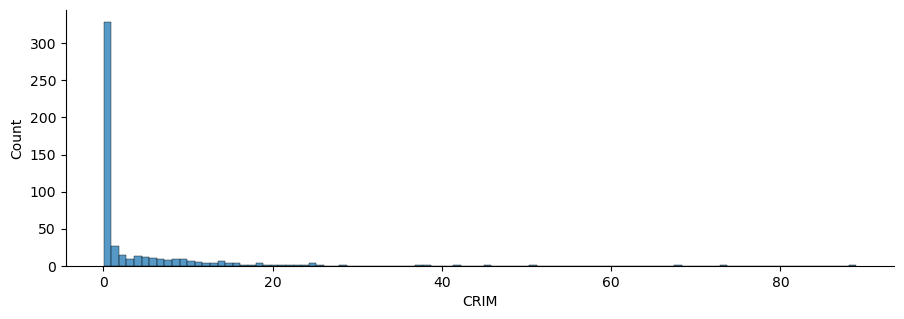

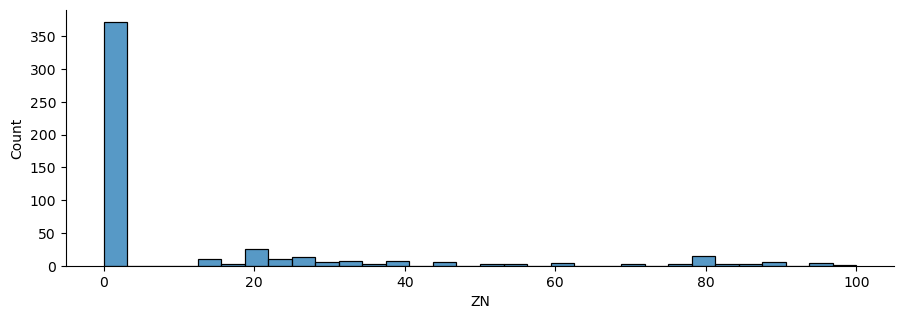

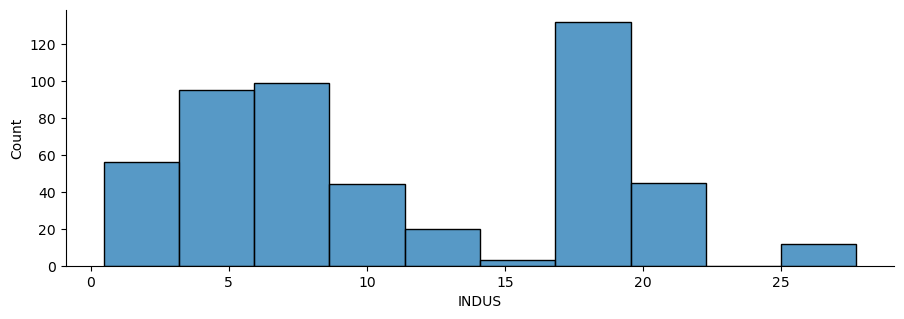

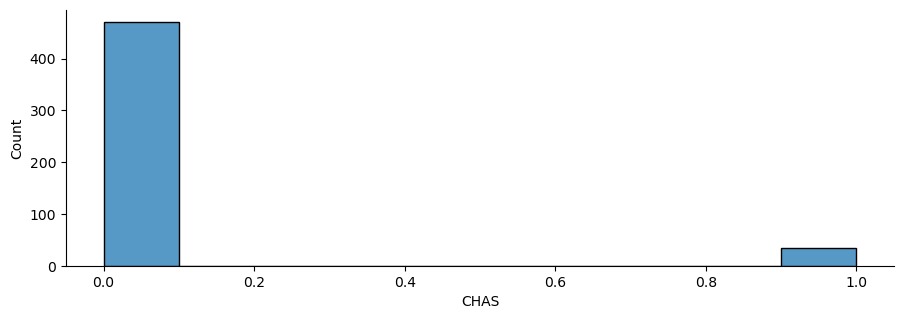

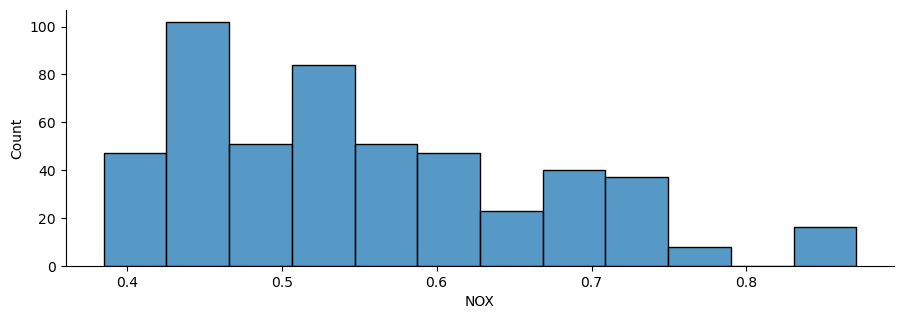

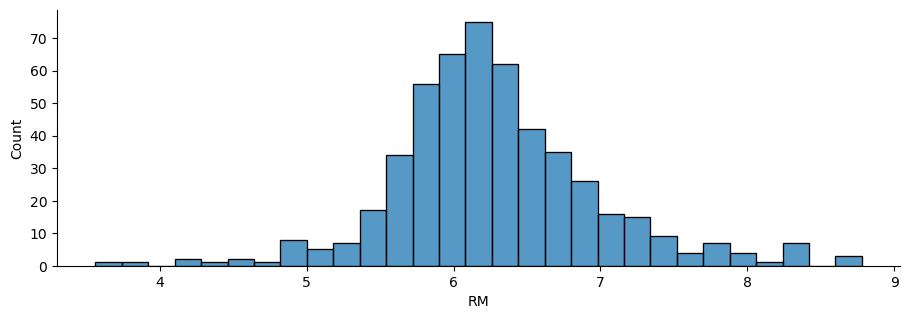

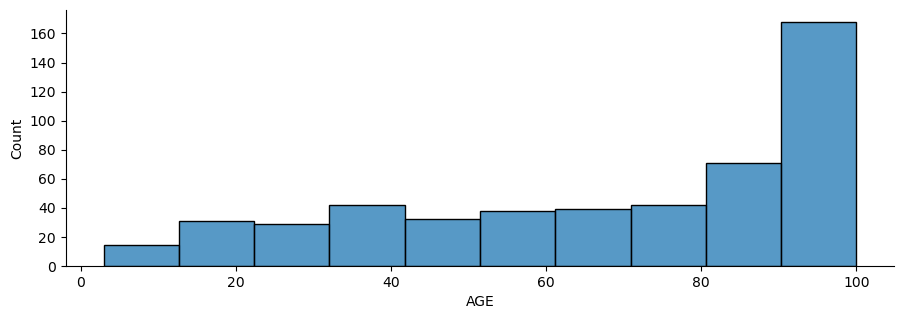

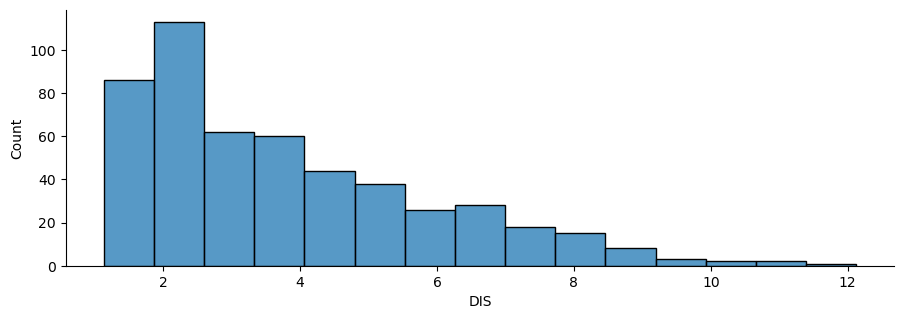

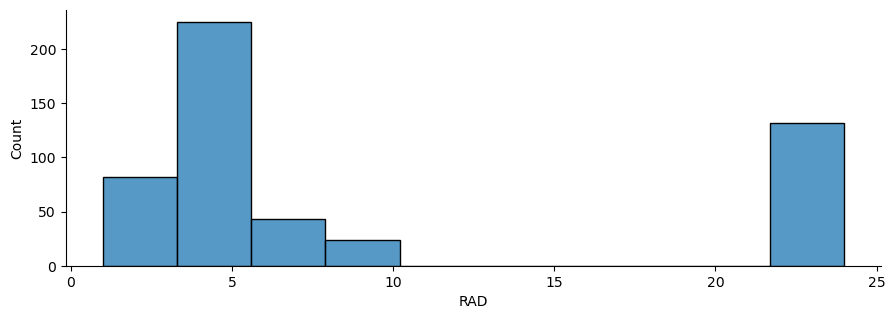

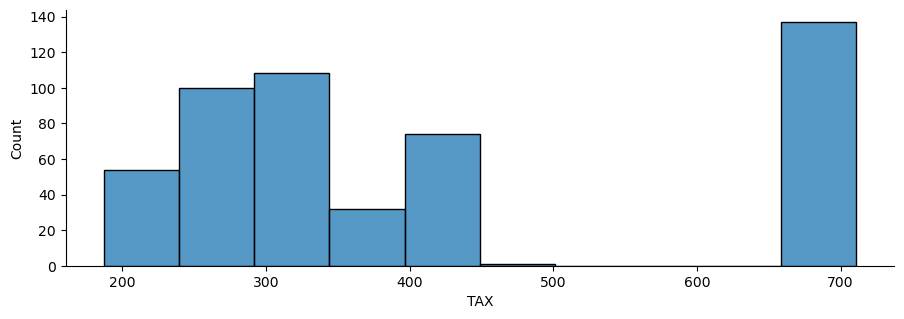

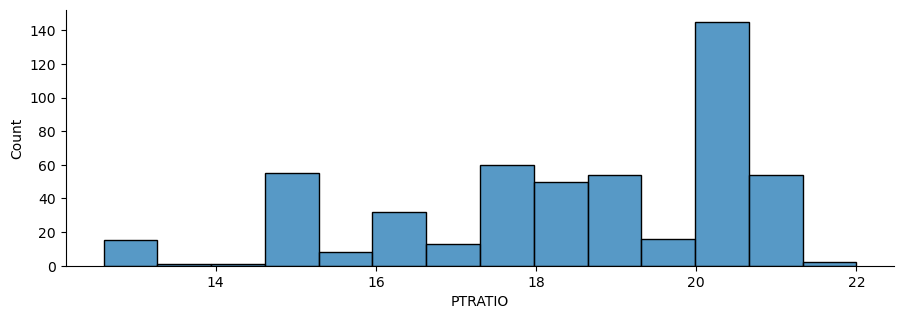

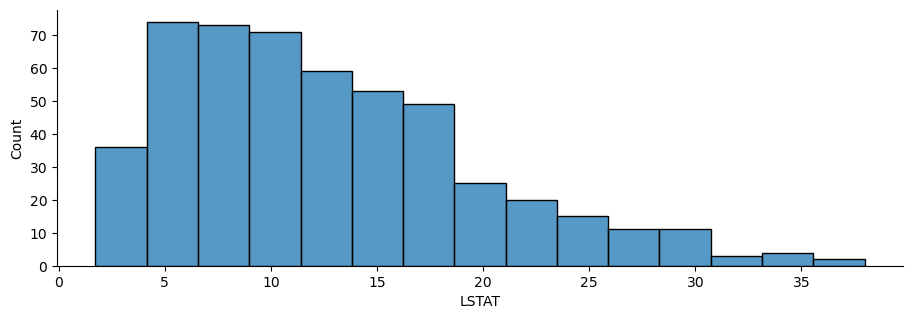

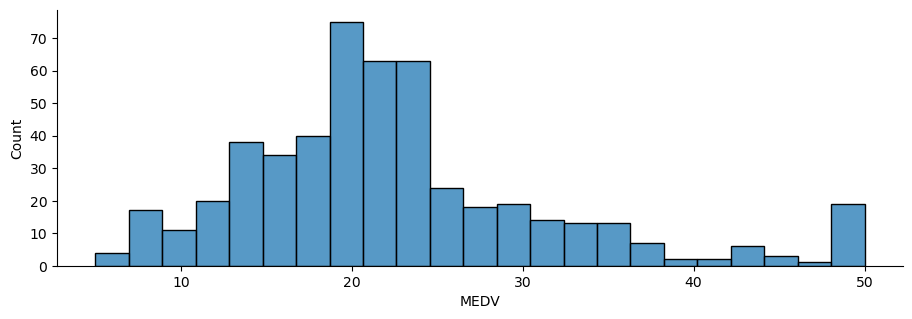

In [14]:
# A simple loop to plot histograms of all the variables.

for i, col in enumerate(Boston_df.columns):
    ax = sns.displot(Boston_df[col])
    plt.gcf().set_size_inches(10, 3)

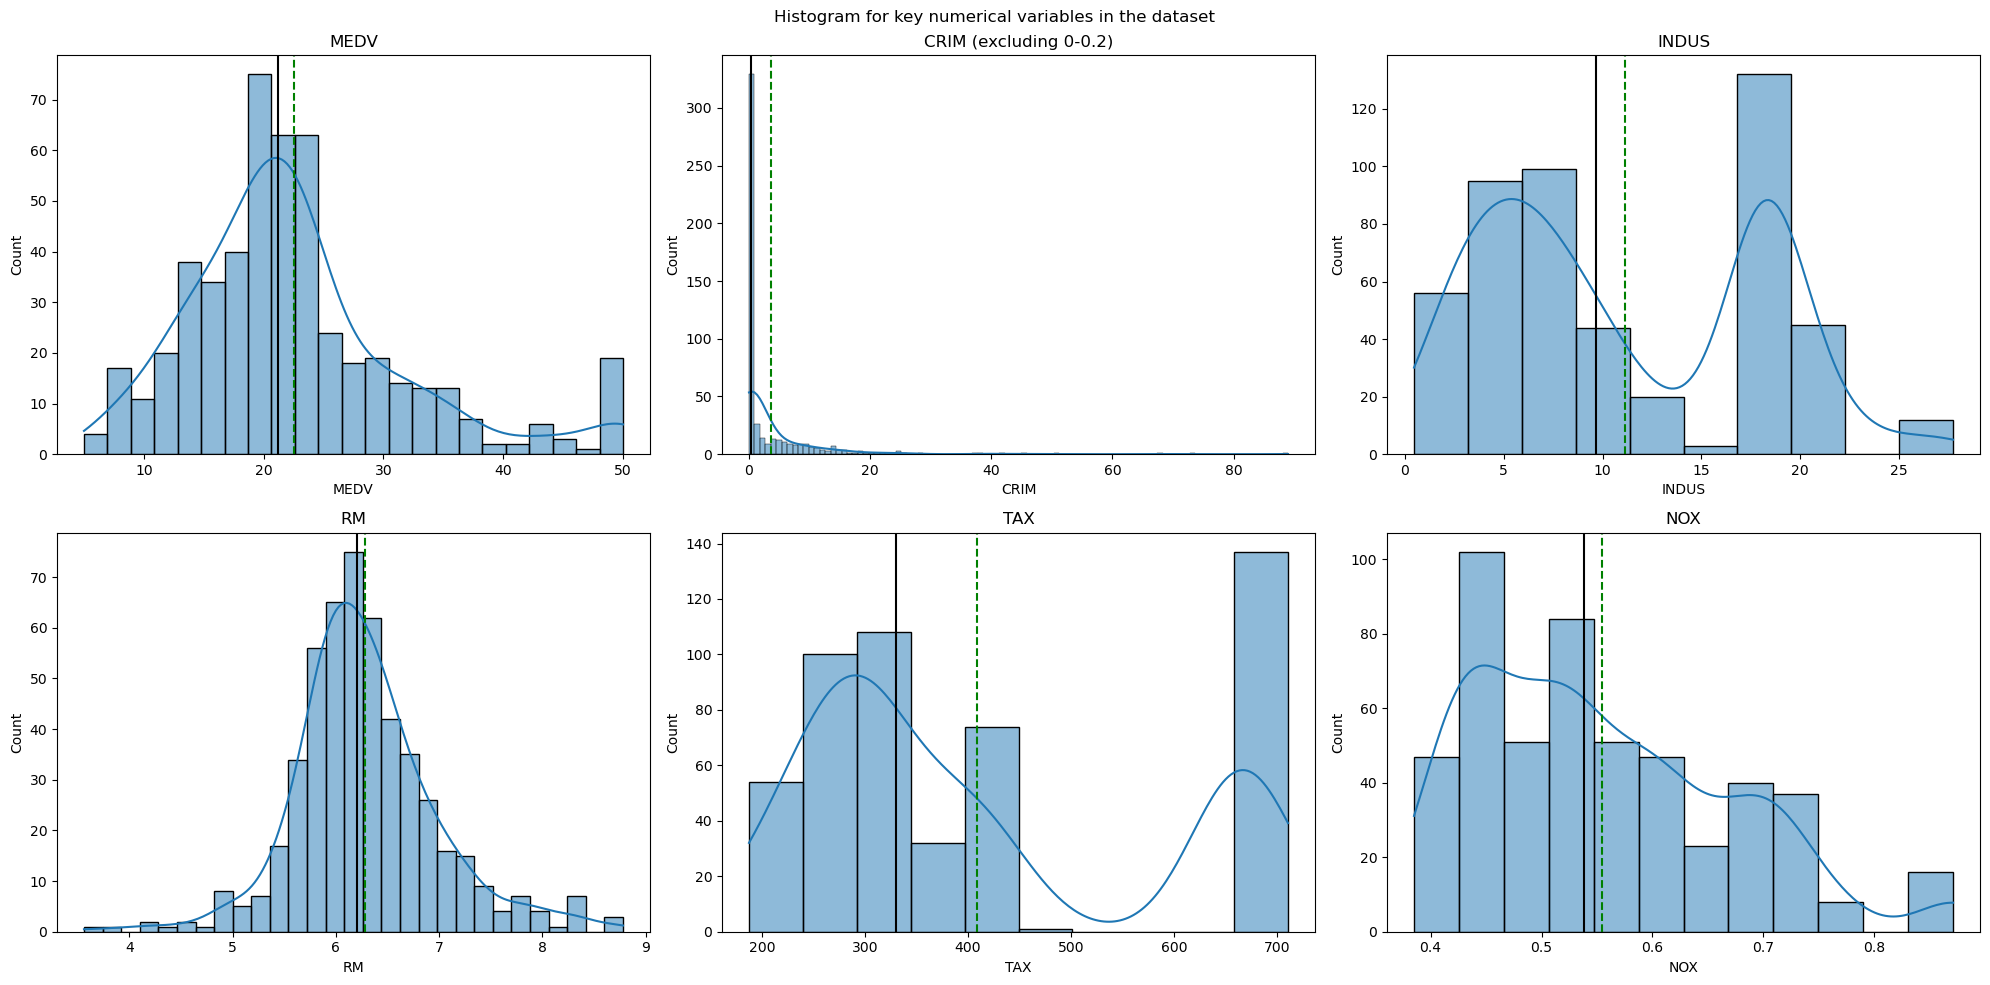

In [15]:
#Plotting some relevant histograms applying median and mean lines to each one.

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histogram for key numerical variables in the dataset')

plot_titles = ['MEDV', 'CRIM (excluding 0-0.2)', 'INDUS', 'RM', 'TAX', 'NOX']
plot_features = ['MEDV', 'CRIM', 'INDUS', 'RM', 'TAX', 'NOX']

for i, ax in enumerate(axes.flatten()):
    feature = plot_features[i]
    sns.histplot(x=feature, data=Boston_df, kde=True, ax=ax)
    ax.set_title(plot_titles[i])
    ax.axvline(Boston_df[feature].mean(), color="green", linestyle="--")
    ax.axvline(Boston_df[feature].median(), color="black", linestyle="-")
    # Add mean and median to each histogram

plt.tight_layout()
plt.show()

CRIM
Skew : 5.22


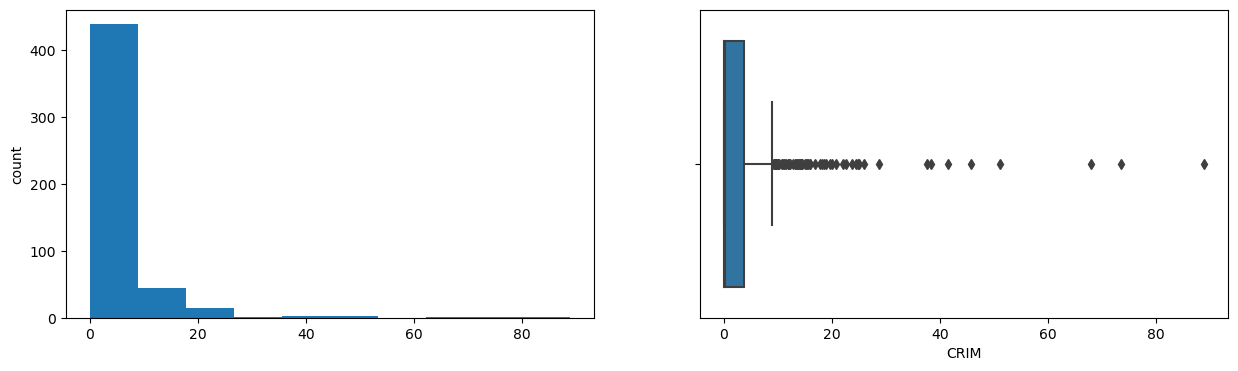

ZN
Skew : 2.23


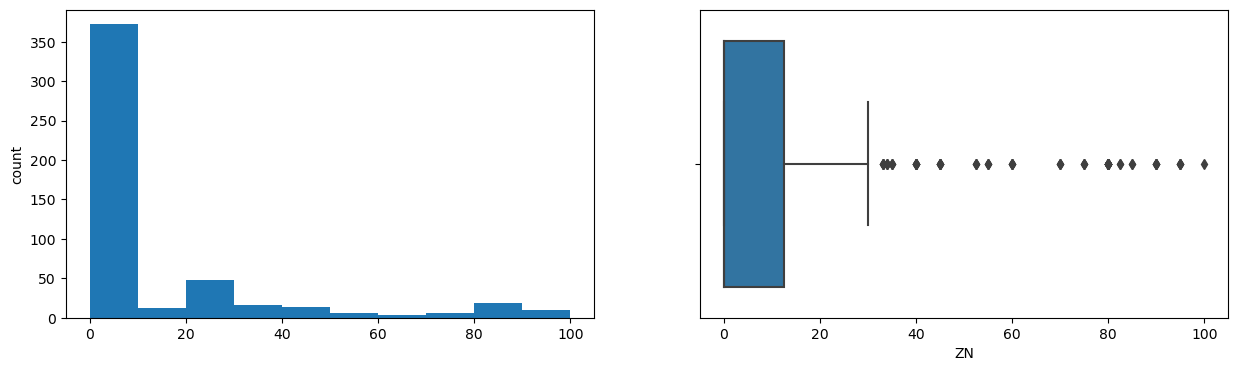

INDUS
Skew : 0.3


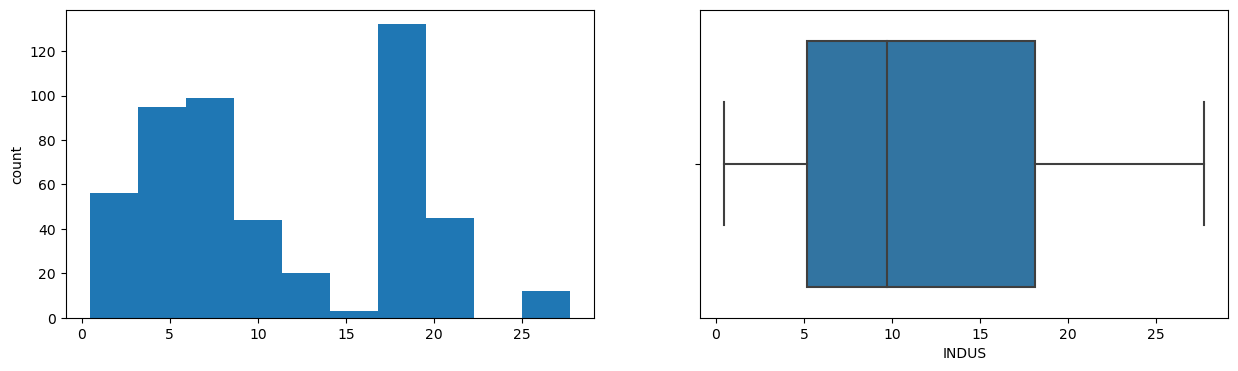

CHAS
Skew : 3.41


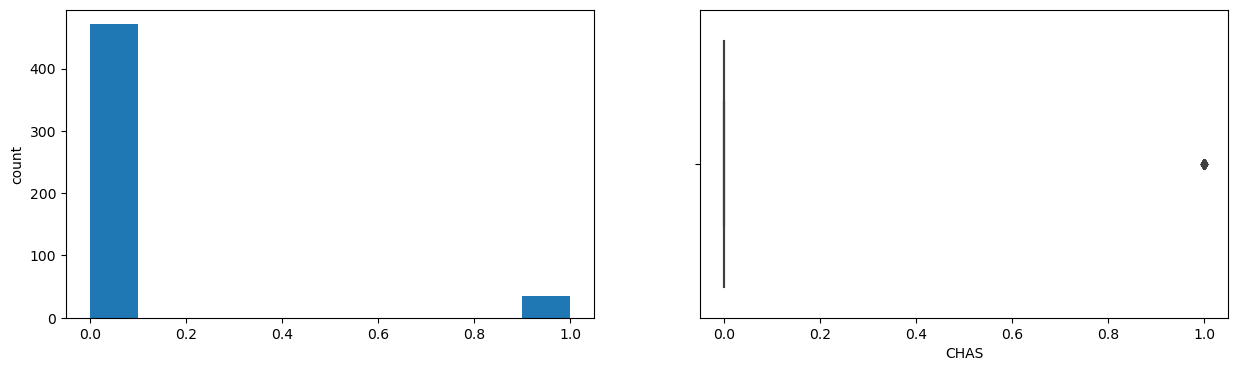

NOX
Skew : 0.73


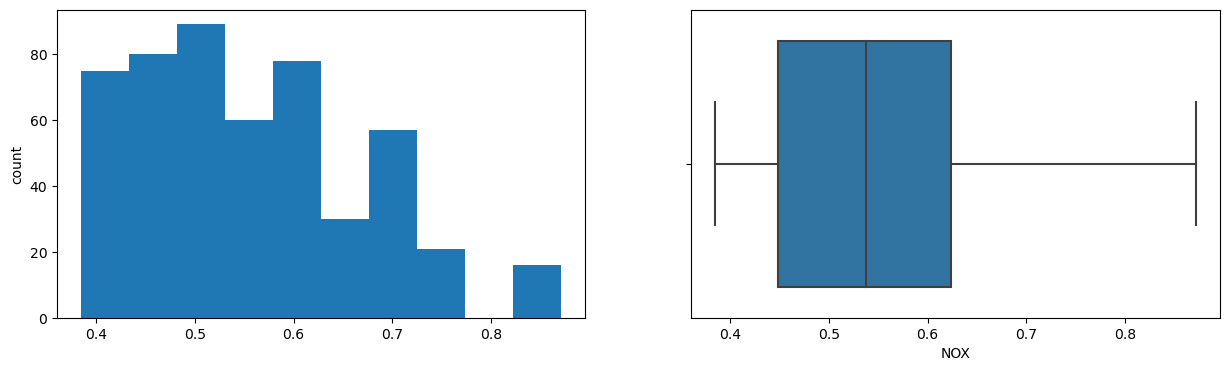

RM
Skew : 0.4


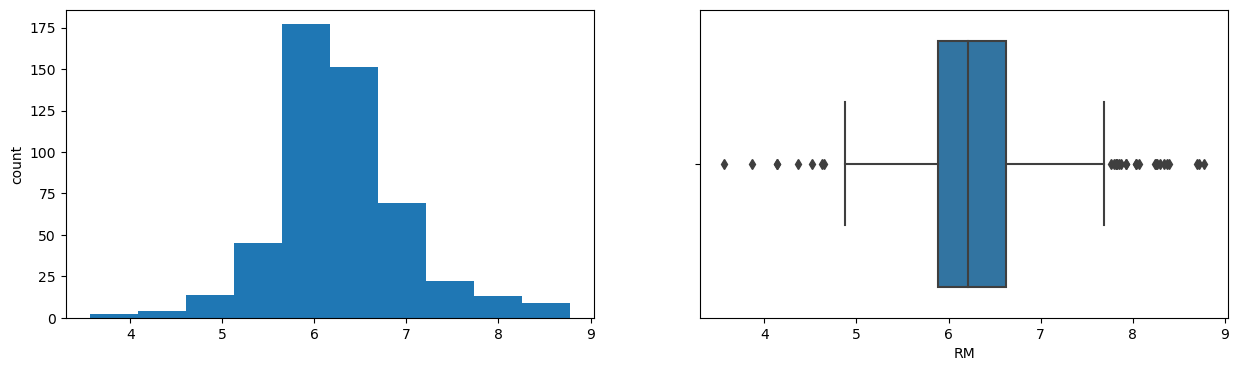

AGE
Skew : -0.6


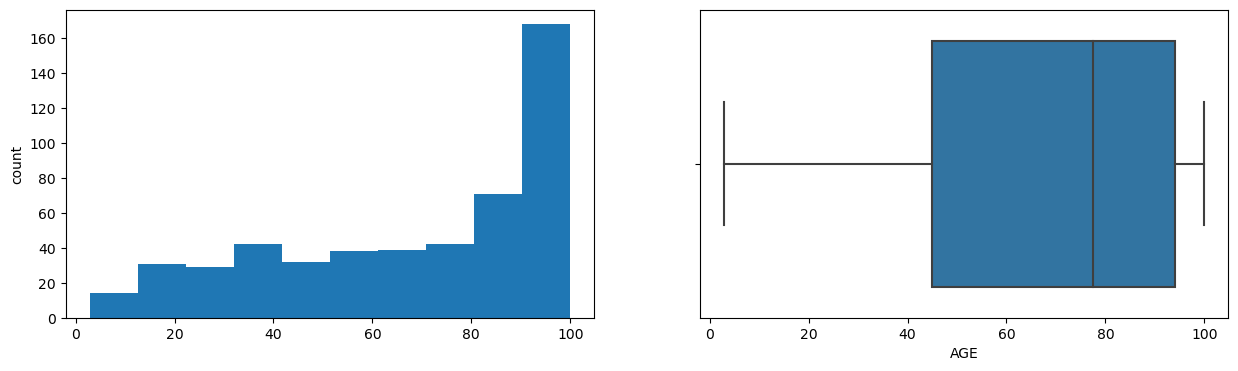

DIS
Skew : 1.01


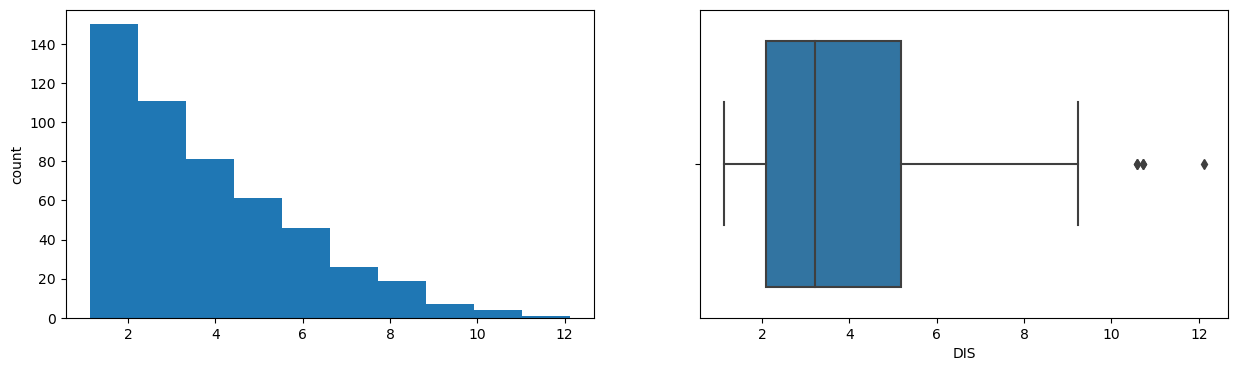

RAD
Skew : 1.0


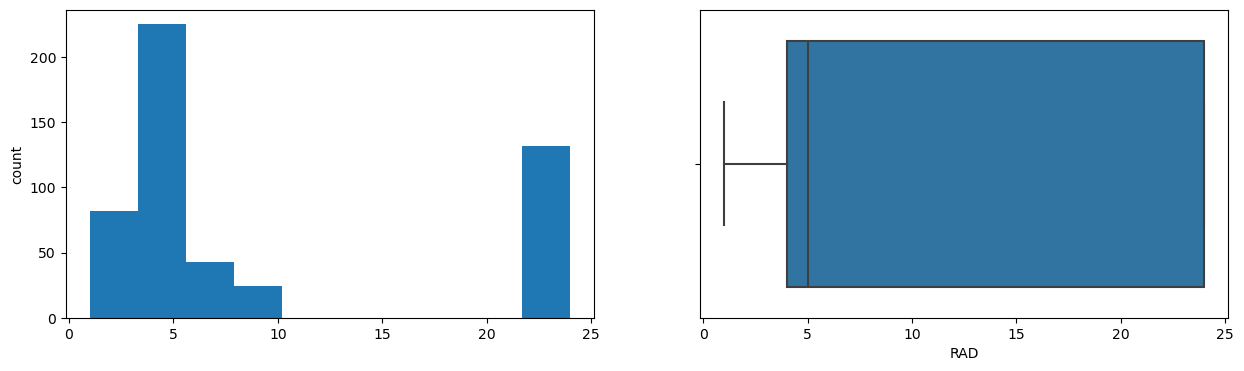

TAX
Skew : 0.67


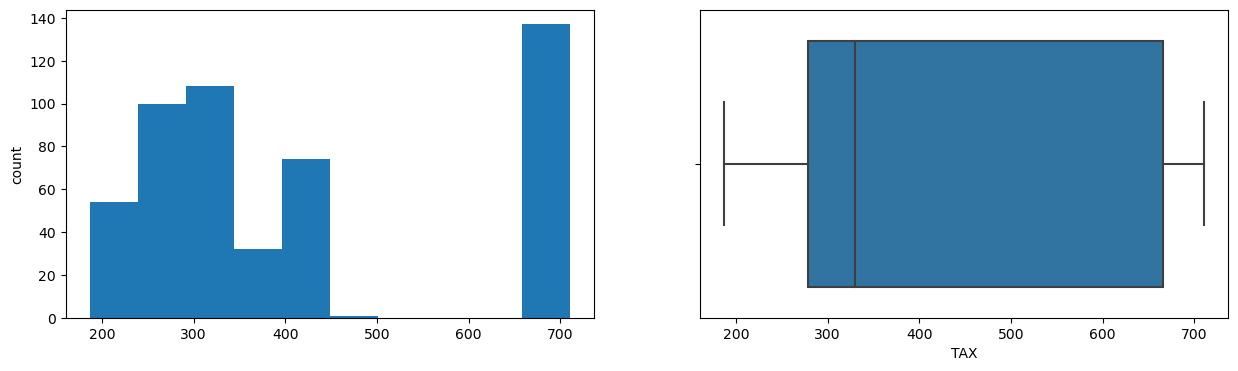

PTRATIO
Skew : -0.8


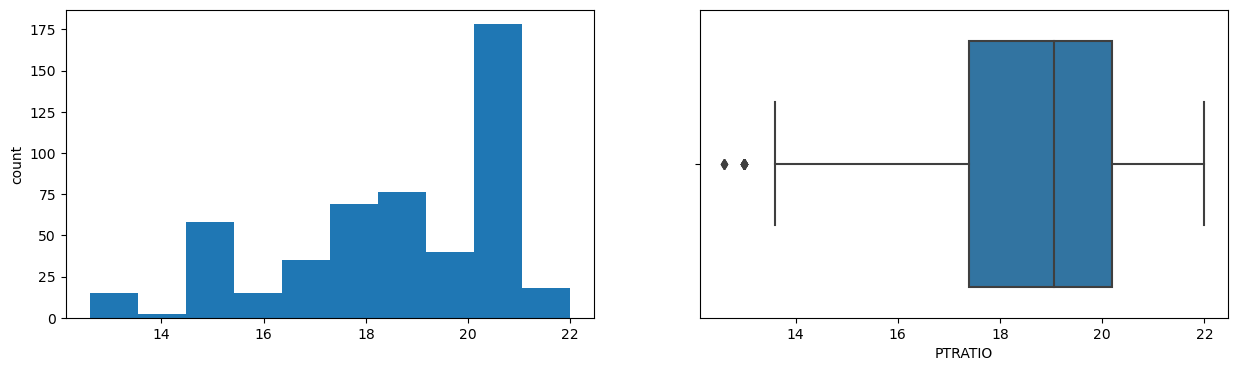

LSTAT
Skew : 0.91


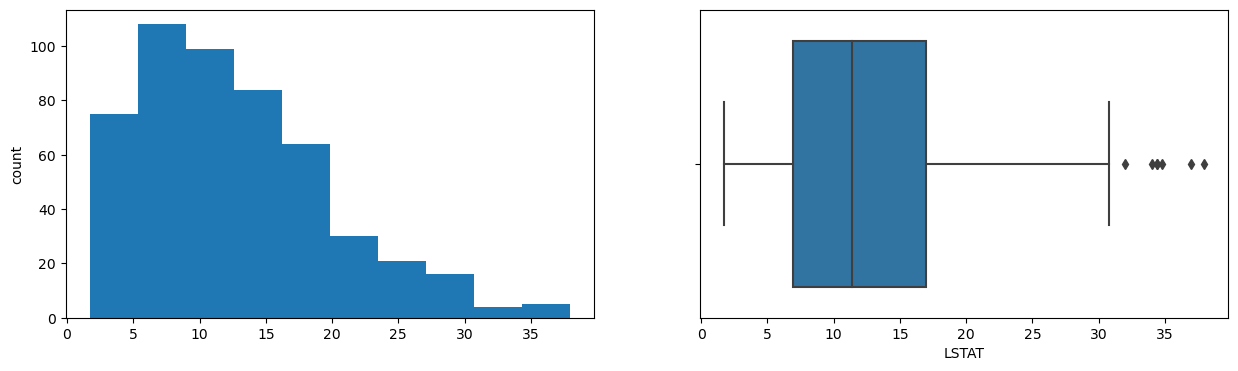

MEDV
Skew : 1.11


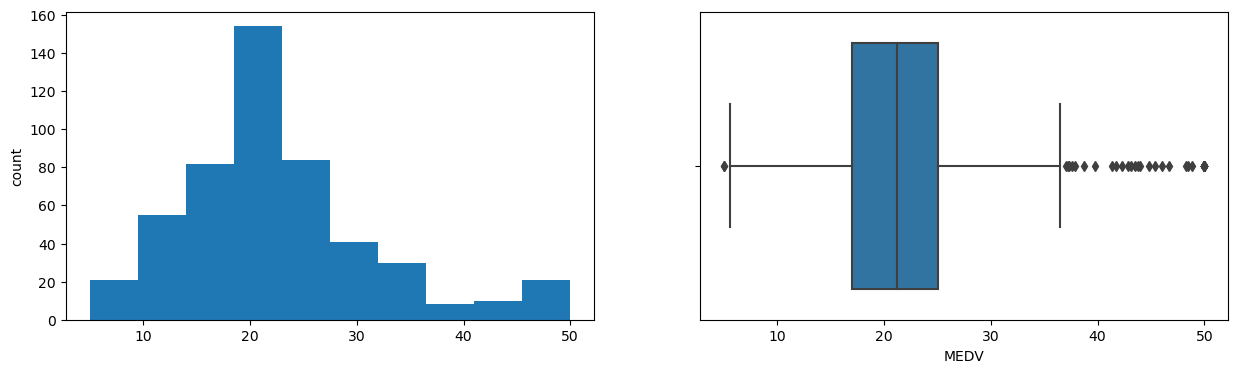

In [16]:
# Plotting some boxplots to identify possible outliers.

result = Boston_df.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(Boston_df[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    Boston_df[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = Boston_df[col])
    
    plt.show()

**Observations**

Although some variables seem to show outliers, as is the case with "CRIM", "ZN", "PTRATIO" and "MEDV",  there is no way of guaranteeing that those datapoints are not representative of the population. Therefore, as it has been practice amongst my mentorship cohort, we'll decide not to treat these extreme values.

#### Bi Variate

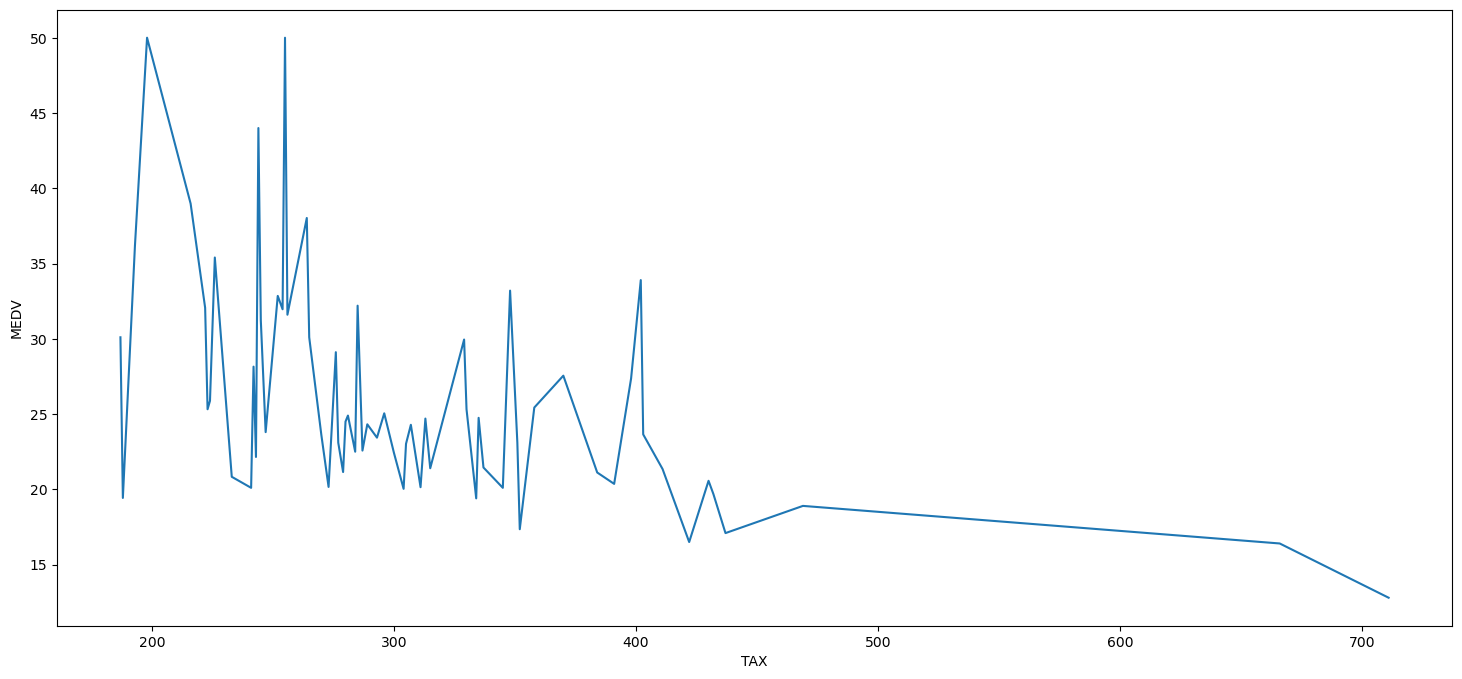

In [18]:
# A line plot to show the correlation between the variables "TAX" and "MEDV". 

fig = plt.figure(figsize = (18, 8))

sns.lineplot(x = 'TAX', y = 'MEDV', data = Boston_df, ci = None, estimator = 'mean');

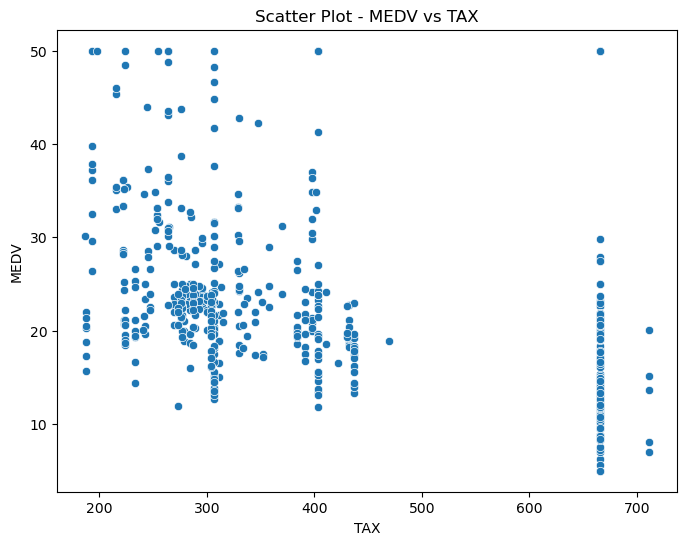

In [18]:
# a scatter plot of the relation between MEDV and TAX
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TAX', y='MEDV', data=Boston_df)
plt.title('Scatter Plot - MEDV vs TAX')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

Observation:

Because the variable "MEDV" shows the Median value of owner-occupied houses, the higher property taxes of around 700$ 

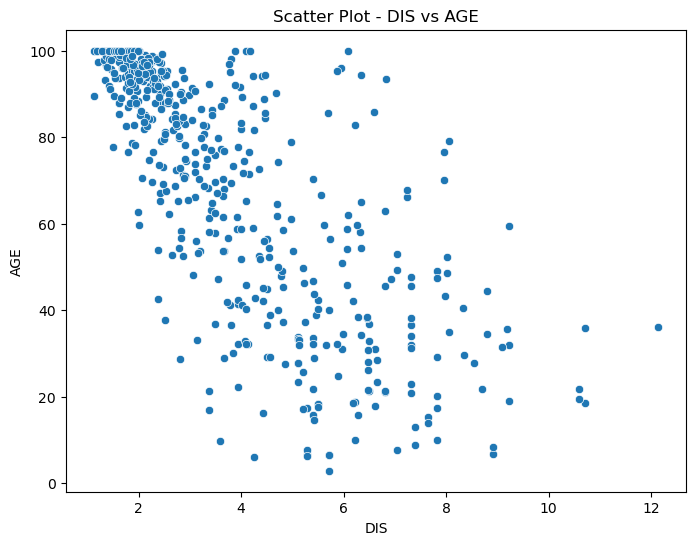

In [87]:
# a scatter plot of the relation between DIS and AGE

plt.figure(figsize=(8, 6))
sns.scatterplot(x='DIS', y='AGE', data=Boston_df)
plt.title('Scatter Plot - DIS vs AGE')
plt.xlabel('DIS')
plt.ylabel('AGE')
plt.show()

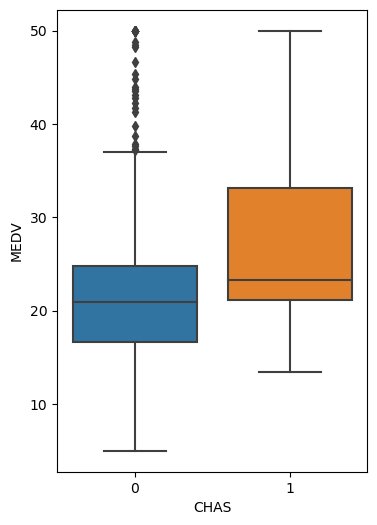

In [19]:
# Set the figure size
plt.figure(figsize = (4, 6))

# Create the boxplots
sns.boxplot(x = Boston_df['CHAS'], y = Boston_df['MEDV'])
plt.show()

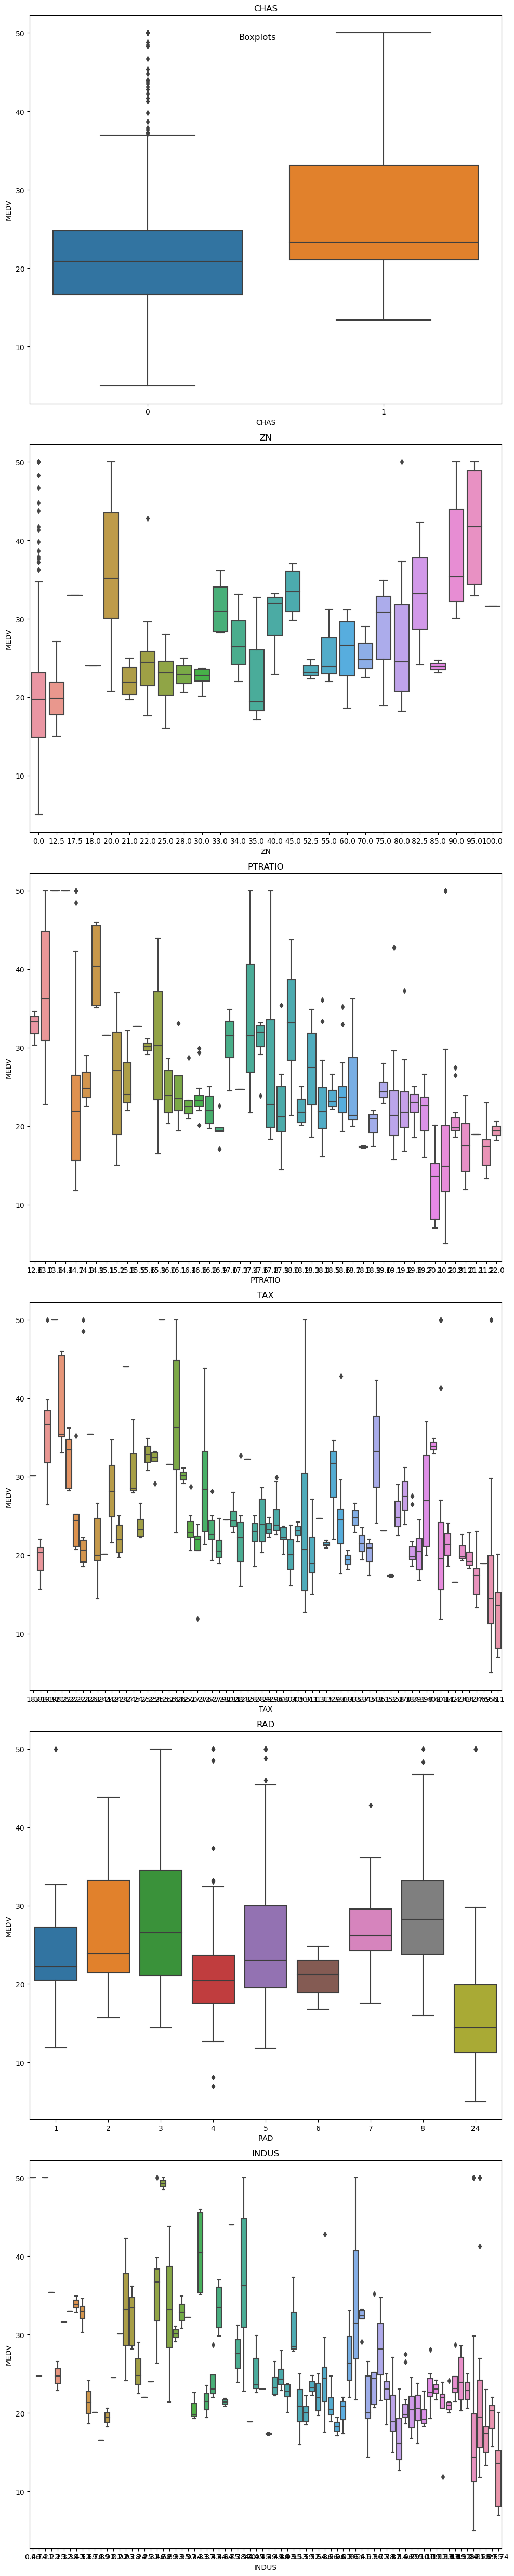

In [20]:
# reploting some key variables to understand their distribution when compared to the variable "MEDV"

fig, axes = plt.subplots(6, 1, figsize=(10, 50))
fig.suptitle('Boxplots')

sns.boxplot(x=Boston_df['CHAS'], y=Boston_df['MEDV'], ax=axes[0])
axes[0].set_title('CHAS')

sns.boxplot(x=Boston_df['ZN'], y=Boston_df['MEDV'], ax=axes[1])
axes[1].set_title('ZN')

sns.boxplot(x=Boston_df['PTRATIO'], y=Boston_df['MEDV'], ax=axes[2])
axes[2].set_title('PTRATIO')

sns.boxplot(x=Boston_df['TAX'], y=Boston_df['MEDV'], ax=axes[3])
axes[3].set_title('TAX')

sns.boxplot(x=Boston_df['RAD'], y=Boston_df['MEDV'], ax=axes[4])
axes[4].set_title('RAD')

sns.boxplot(x=Boston_df['INDUS'], y=Boston_df['MEDV'], ax=axes[5])
axes[5].set_title('INDUS')

plt.tight_layout()
plt.show()

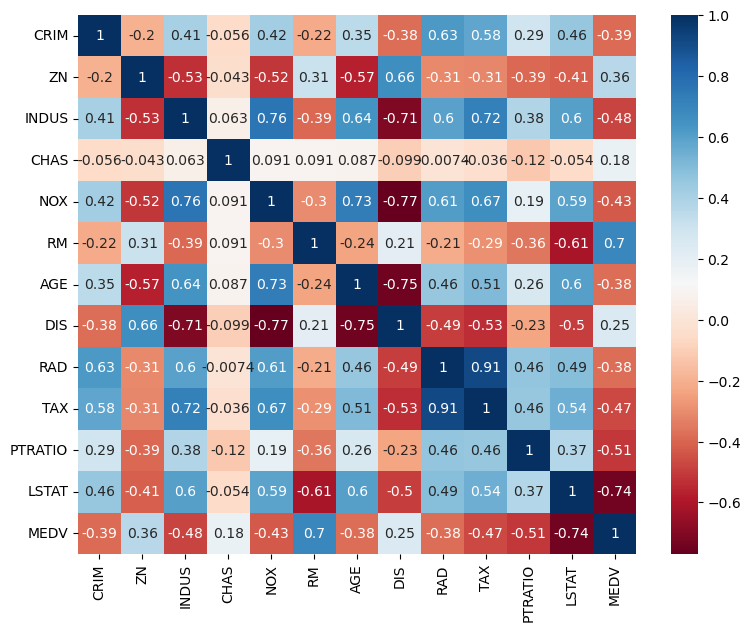

In [21]:
# Find correlation matrix
corr_mat = Boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr()

# Plot the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_mat, annot=True, cmap='RdBu')
plt.show()

**Observations**

The heatmap provides the correlation between variables and as usual, a better view of the dataset. In this particular dataset, the variables were not easy to interpret to begin with. A lot of (to a foreigner) strange names and ways of measuring urban areas. Once we get to the heatmap however, everything became clearer. It becomes apparent that most features with the exception of "RM" "DIS" "CHAS" and "ZN", contribute negatively towards the "MEDV". Observing those features, we can confirm the intuition that they are mostly referent to rhings that in the real world we woukld say decreases the value of a property, like high crime rate, proximity to industrial zones, pupil teacher ratio, distance to employment centers...


## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

As shown above, there are no missing values in the data. No treatment required.

## Model Building - Linear Regression

#### Splitting the data into training and testing

In [24]:
# Copying the Dataset

Boston_Copy = Boston_df.copy()

In [25]:
# Splitting the data

X = Boston_Copy.drop('MEDV', axis=1)  # Features 
y = Boston_Copy['MEDV']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (404, 12) (404,)
Test set shape: (102, 12) (102,)


#### Functions to display metrics easily


In [26]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [27]:
# checking the datashape to make sure both dataframes have the same dimensions.

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (102, 12)
X_train shape: (404, 12)
y_test shape: (102,)
y_train shape: (404,)


In [28]:
# Adding the intercept term
X_train_const = sm.add_constant(X_train)

# Add constant to test data
X_test_const = sm.add_constant(X_test)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(y_train, X_train_const)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     92.64
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.82e-106
Time:                        12:40:38   Log-Likelihood:                -1203.1
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     391   BIC:                             2484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9705      5.555      6.655      0.0

#### **Evaluation Metrics for first build**

In [29]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test = model_performance_regression(ols_res_0, X_train_const, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.754397,3.424469,0.739802,0.731129,17.279637


**Observations:**

- We can observe that `R-squared` for the model is `~0.73`. 
- Not all the variables are statistically significant enough to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we check the `p-value` for all the independent variables. Independent variables with a p-value of higher than 0.05 are not significant for the 95% confidence level.

- Mean Absolute Error (MAE) indicates that the current model can predict the Median value of owner-occupied homes in 1000 dollars within mean error of 3424 dollars.

- Mean Absolute Percentage Error is ~17% on the test data, indicating that the average difference between the predicted value and the actual value is ~17%.

**Interpreting the Regression Results:**

(getting the interpretation of the values from other notebooks  from the ML module)

1. **Adjusted R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.73**

2. **coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P > |t|**: The p-value:
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis 

    **Ho:** Null Hypothesis - The independent feature is not significant 
   
    **Ha:** Alternate Hypothesis - The independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).



* Both the **R-squared and Adjusted R-squared of the model are around 74%**. 

* We can examine the significance of the regression model, and try dropping insignificant variables.

#### **Removing Multicollinearity**

In [30]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])],
    index = X_train_const.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      533.795744
CRIM         1.696872
ZN           2.465370
INDUS        3.866578
CHAS         1.091813
NOX          4.455348
RM           1.927214
AGE          2.984020
DIS          4.167114
RAD          7.619827
TAX          8.932003
PTRATIO      1.849262
LSTAT        2.773390
dtype: float64



**Observation**

There are a few variables with high correlation to them such as TAX and RAD. We will drop them and build a new model.

In [31]:
X_train_2 = X_train_const.drop(['TAX', 'AGE'], axis=1)  #  Drop TAX and AGE 

vif_series = pd.Series(
    [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])],
    index = X_train_2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      524.548732
CRIM         1.695667
ZN           2.250254
INDUS        3.263568
CHAS         1.078265
NOX          4.161885
RM           1.835503
DIS          3.732103
RAD          2.736180
PTRATIO      1.821316
LSTAT        2.529898
dtype: float64



In [88]:
#Checking the new dataset
X_train_2.head(10)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
477,1.0,15.02340,0.0,18.10,0,0.6140,5.304,2.1007,24,20.2,24.91
15,1.0,0.62739,0.0,8.14,0,0.5380,5.834,4.4986,4,21.0,8.47
332,1.0,0.03466,35.0,6.06,0,0.4379,6.031,6.6407,1,16.9,7.83
423,1.0,7.05042,0.0,18.10,0,0.6140,6.103,2.0218,24,20.2,23.29
19,1.0,0.72580,0.0,8.14,0,0.5380,5.727,3.7965,4,21.0,11.28
325,1.0,0.19186,0.0,7.38,0,0.4930,6.431,5.4159,5,19.6,5.08
335,1.0,0.03961,0.0,5.19,0,0.5150,6.037,5.9853,5,20.2,8.01
56,1.0,0.02055,85.0,0.74,0,0.4100,6.383,9.1876,2,17.3,5.77
437,1.0,15.17720,0.0,18.10,0,0.7400,6.152,1.9142,24,20.2,26.45
409,1.0,14.43830,0.0,18.10,0,0.5970,6.852,1.4655,24,20.2,19.78


Refit the model withouth the droped high correlated variables.

In [33]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(y_train, X_train_2)

# Fitting the Mo1el
ols_res_1= ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     109.1
Date:                Thu, 25 May 2023   Prob (F-statistic):          7.41e-107
Time:                        12:40:38   Log-Likelihood:                -1206.6
No. Observations:                 404   AIC:                             2435.
Df Residuals:                     393   BIC:                             2479.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2857      5.541      6.369      0.0

In [34]:
# Getting the evaluation metrics for the ols_res_1 model

lin_reg_test = model_performance_regression(ols_res_1, X_train_2, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.795761,3.442001,0.735255,0.727826,17.320797


In [35]:
X_train_3 = X_train_2.drop('INDUS', axis=1)  #  Drop INDUS feature 

vif_series = pd.Series(
    [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])],
    index = X_train_3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      524.477702
CRIM         1.695075
ZN           2.249724
CHAS         1.073868
NOX          3.620932
RM           1.780374
DIS          3.542038
RAD          2.682158
PTRATIO      1.786083
LSTAT        2.515375
dtype: float64



In [36]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_2 = sm.OLS(y_train, X_train_3)

# Fitting the Model
ols_res_2= ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     121.4
Date:                Thu, 25 May 2023   Prob (F-statistic):          8.44e-108
Time:                        12:40:38   Log-Likelihood:                -1206.9
No. Observations:                 404   AIC:                             2434.
Df Residuals:                     394   BIC:                             2474.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2394      5.537      6.365      0.0

In [89]:
# Getting the evaluation metrics for the ols_res_2 model

lin_reg_test = model_performance_regression(ols_res_2, X_train_3, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.79891,3.436294,0.734907,0.728162,17.286513


In [38]:
X_train_4 = X_train_3.drop(['ZN', 'RAD'], axis=1)  #  Drop ZN and RAD features due to a high  p-value.

In [39]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_3 = sm.OLS(y_train, X_train_4)

# Fitting the Mo1el
ols_res_3= ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     154.2
Date:                Thu, 25 May 2023   Prob (F-statistic):          6.26e-109
Time:                        12:40:38   Log-Likelihood:                -1209.4
No. Observations:                 404   AIC:                             2435.
Df Residuals:                     396   BIC:                             2467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8452      5.073      6.278      0.0

**Observations**

We couldn't improve the first model just by removing the high correlated variables and high p-value variables. 


We'll now try to improve the model using scaling techniques to create a more uniform dataset.

### Retraining the model with the data scaled.

In [90]:
# Copying X_train features

X_train_copy = X_train.copy()

# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(X_train_copy)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = X_train_copy.index, columns = X_train_copy.columns)

train_features_scaled.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
477,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.639625
15,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.185982
332,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.168322
423,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.594923
19,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.263521
325,0.002055,0.00,0.245926,0.0,0.222222,0.522270,0.121524,0.389773,0.173913,0.190840,0.744681,0.092439
335,0.000343,0.00,0.164815,0.0,0.267490,0.442140,0.325438,0.441552,0.173913,0.070611,0.808511,0.173289
56,0.000129,0.85,0.000000,0.0,0.051440,0.512508,0.337796,0.732752,0.043478,0.240458,0.500000,0.111479
437,0.170491,0.00,0.642963,0.0,0.730453,0.465528,1.000000,0.071347,1.000000,0.914122,0.808511,0.682119
409,0.162186,0.00,0.642963,0.0,0.436214,0.607891,1.000000,0.030545,1.000000,0.914122,0.808511,0.498068


In [41]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_0 = sm.OLS(y_train, train_features_scaled)

# Fitting the Model
ols_res_scaled_0 = ols_model_scaled_0.fit()

print(ols_res_scaled_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     92.64
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.82e-106
Time:                        12:40:38   Log-Likelihood:                -1203.1
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     391   BIC:                             2484.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6272      2.227     13.756      0.0

In [42]:
train_features_scaled_1 = train_features_scaled.drop(['INDUS', 'AGE'], axis=1)  #  Drop INDUS and AGE features

In [43]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_1 = sm.OLS(y_train, train_features_scaled_1)

# Fitting the Model
ols_res_scaled_1 = ols_model_scaled_1.fit()

print(ols_res_scaled_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     111.7
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.77e-108
Time:                        12:40:38   Log-Likelihood:                -1203.2
No. Observations:                 404   AIC:                             2428.
Df Residuals:                     393   BIC:                             2472.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6477      2.111     14.518      0.0

In [44]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test = model_performance_regression(ols_res_scaled_1, train_features_scaled_1, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.755547,3.428821,0.739676,0.732371,17.303729


In [45]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_1.values, i) for i in range(train_features_scaled_1.shape[1])],
    index = train_features_scaled_1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      77.442963
CRIM        1.695392
ZN          2.406354
CHAS        1.079737
NOX         3.853324
RM          1.818287
DIS         3.603608
RAD         7.155563
TAX         7.544048
PTRATIO     1.815412
LSTAT       2.515484
dtype: float64



In [46]:
#  Drop RAD, DIS, ZN, LSTAT and TAX features due to high correlation.
train_features_scaled_2 = train_features_scaled_1.drop(['RAD', 'TAX', 'DIS', 'ZN', 'LSTAT'], axis=1)  

In [47]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_2 = sm.OLS(y_train, train_features_scaled_2)

# Fitting the Model
ols_res_scaled_2 = ols_model_scaled_2.fit()

print(ols_res_scaled_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.23e-86
Time:                        12:40:38   Log-Likelihood:                -1267.2
No. Observations:                 404   AIC:                             2546.
Df Residuals:                     398   BIC:                             2570.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4882      1.655      8.151      0.0

In [57]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test = model_performance_regression(ols_res_scaled_2, train_features_scaled_2, y_train)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.571155,3.759337,0.642724,0.637325,19.382282


**Observations**
Removing the features in the "train_features_scaled_2"  variable actually penalized the model significantly, indicating that the model lost too many features to be able to predict the results as well as it was before. We shall ignore the last operations and revert to a better model. 

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

## Checking Linear Regression Assumptions

#### **Checking Mean of residuals. They should be 0 and normality of error terms**

In [62]:
# Residuals
residual = ols_res_scaled_1.resid 

In [63]:
residual.mean()

2.447415207789523e-13

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **Tests for Normality**

<AxesSubplot:ylabel='Count'>

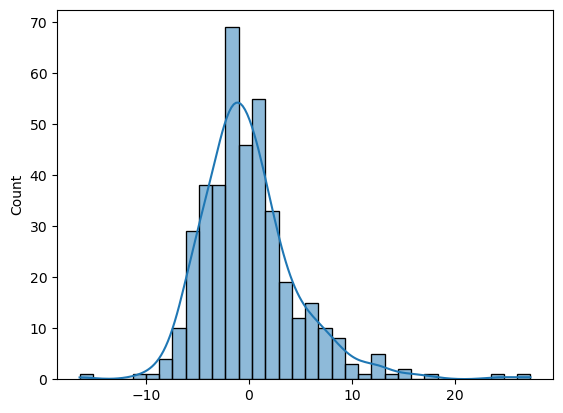

In [50]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

### **Linearity of Variables**

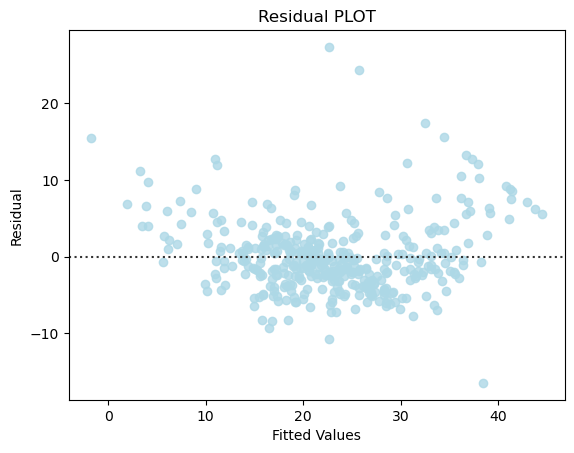

In [51]:
# Predicted values
fitted = ols_res_scaled_1.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

In [52]:
# Log transformation on the target variable
train_target_log = np.log(y_train)

In [53]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_3 = sm.OLS(train_target_log, train_features_scaled_2)

# Fitting the Model
ols_res_scaled_3 = ols_model_scaled_3.fit()


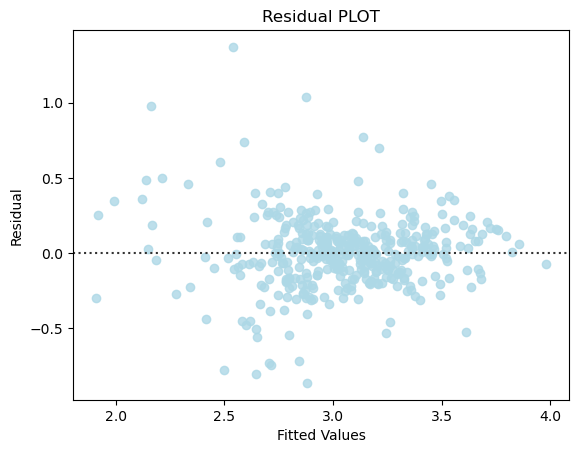

In [54]:
# Predicted values
fitted = ols_res_scaled_3.fittedvalues

# Residuals
residual = ols_res_scaled_3.resid 

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

In [55]:
print(ols_res_scaled_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 25 May 2023   Prob (F-statistic):           8.23e-91
Time:                        12:40:55   Log-Likelihood:                 3.6583
No. Observations:                 404   AIC:                             4.683
Df Residuals:                     398   BIC:                             28.69
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8464      0.071     39.961      0.0

**Observations**

We can actually observe that the log transformation influenced negatively the model.
We will revert and use the model "ols_res_scaled_1" as it provided the best results

#### Trying the Log transformation on the best result model "ols_res_scaled_1"

In [68]:
# Calling the OLS algorithm on the train features and the target variable to fit the model with the 
#features from "ols_res_scaled_1" using the logarithmic transformation of the dependent variable

ols_model_scaled_4 = sm.OLS(train_target_log, train_features_scaled_1)

# Fitting the Model
ols_res_scaled_4 = ols_model_scaled_4.fit()

print(ols_res_scaled_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     141.6
Date:                Thu, 25 May 2023   Prob (F-statistic):          1.25e-123
Time:                        12:49:35   Log-Likelihood:                 94.370
No. Observations:                 404   AIC:                            -166.7
Df Residuals:                     393   BIC:                            -122.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6238      0.085     42.614      0.0

### Checking Linear Regression Assumptions for the last model

In [80]:
# Getting the evaluation metrics for the previous OLS model

lin_reg_test_final = model_performance_regression(ols_res_scaled_4, train_features_scaled_1, train_target_log)
lin_reg_test_final

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.191565,0.139827,0.782774,0.776678,4.856024


In [81]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_1.values, i) for i in range(train_features_scaled_1.shape[1])],
    index = train_features_scaled_1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      77.442963
CRIM        1.695392
ZN          2.406354
CHAS        1.079737
NOX         3.853324
RM          1.818287
DIS         3.603608
RAD         7.155563
TAX         7.544048
PTRATIO     1.815412
LSTAT       2.515484
dtype: float64



In [91]:
#  Drop RAD and TAX features
train_features_scaled_3 = train_features_scaled_1.drop(['RAD', 'TAX', 'ZN'], axis=1)  

In [92]:
# Calling the OLS algorithm on the train features and the target variable to fit the model with the 
#features from "ols_res_scaled_4" after droping the high correlated varables "DIS" and "TAX"

ols_model_scaled_5 = sm.OLS(train_target_log, train_features_scaled_3)

# Fitting the Model
ols_res_scaled_5 = ols_model_scaled_5.fit()

print(ols_res_scaled_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     196.9
Date:                Thu, 25 May 2023   Prob (F-statistic):          1.01e-124
Time:                        21:48:52   Log-Likelihood:                 88.880
No. Observations:                 404   AIC:                            -161.8
Df Residuals:                     396   BIC:                            -129.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5597      0.082     43.448      0.0

In [93]:
# Getting the evaluation metrics for the last OLS model

lin_reg_test_final = model_performance_regression(ols_res_scaled_5, train_features_scaled_3, train_target_log)
lin_reg_test_final

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.194186,0.141267,0.776789,0.772268,4.898305


In [105]:
# printing Mean Square Error score
print("Mean Square Error:", (ols_res_scaled_5.mse_resid))

Mean Square Error: 0.0384700334734097


**Observation**

The scores went down slighly but we checked one of the assumptions of linear regression . No multicollinearity

### **No Heteroscedasticity**

#### **Test for Homoscedasticity**

* **Homoscedasticity -** If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* **Heteroscedasticity -** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

- We will use Goldfeld–Quandt test to check homoscedasticity.

    - Null hypothesis : Residuals are homoscedastic

    - Alternate hypothesis : Residuals are hetroscedastic

In [94]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [95]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(train_target_log, train_features_scaled_3)

lzip(name, test)

[('F statistic', 1.0459238898409815), ('p-value', 0.3774136037413962)]

**Observation**

- As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic.

**Cross-Validation**

In [101]:
# Fitting linear model

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, train_features_scaled_3, train_target_log, cv = 10)

cv_Score12 = cross_val_score(linearregression, train_features_scaled_3, train_target_log, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.748 (+/- 0.174)
Mean Squared Error: 0.040 (+/- 0.018)


**Observations:**

- The R-Squared on the cross-validation is **0.748** which is almost similar to the R-Squared on the training dataset **(0.77)**.
- The MSE on cross-validation is **0.040** which is almost similar to the R-Squared on the training dataset of **0.038**.

## Final Model

In [96]:
# Copying X_test features

X_test_copy = X_test.copy()

# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
test_features_scaled = scaler.fit_transform(X_test_copy)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
test_features_scaled = pd.DataFrame(test_features_scaled, index = X_test_copy.index, columns = X_test_copy.columns)

test_features_scaled.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
173,0.001868,0.000000,0.131598,0.0,0.246347,0.638274,0.830490,0.154823,0.173913,0.206501,0.400000,0.180645
274,0.001096,0.421053,0.218109,1.0,0.114823,0.714733,0.284648,0.304836,0.130435,0.126195,0.511111,0.019062
491,0.002174,0.000000,1.000000,0.0,0.453027,0.541471,0.987207,0.073261,0.130435,1.000000,0.788889,0.445455
72,0.001865,0.000000,0.379399,0.0,0.043841,0.559803,0.017058,0.431623,0.130435,0.223709,0.688889,0.077419
452,0.111147,0.000000,0.646628,0.0,0.670146,0.611670,0.912580,0.125676,1.000000,0.913958,0.800000,0.421994
76,0.002082,0.000000,0.453446,0.0,0.093946,0.607646,0.728145,0.302174,0.173913,0.401530,0.633333,0.266569
316,0.006820,0.000000,0.346041,0.0,0.317328,0.526045,0.820896,0.296556,0.130435,0.221797,0.600000,0.453079
140,0.006222,0.000000,0.785557,0.0,0.484342,0.584172,0.931770,0.046409,0.130435,0.476099,0.911111,0.624047
471,0.088153,0.000000,0.646628,0.0,0.292276,0.596468,0.900853,0.202302,1.000000,0.913958,0.800000,0.292962
500,0.004767,0.000000,0.338343,0.0,0.402923,0.551308,0.783582,0.139301,0.217391,0.388145,0.688889,0.335777


In [ ]:
test_features_scaled = sm.add_constant(test_features_scaled)

test_features_scaled = test_features_scaled.drop(['RAD', 'TAX', 'ZN','INDUS', 'AGE' ], axis = 1)

In [100]:
test_features_scaled.head(10)

,const,CRIM,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
173,1.0,0.001868,0.0,0.246347,0.638274,0.154823,0.400000,0.180645
274,1.0,0.001096,1.0,0.114823,0.714733,0.304836,0.511111,0.019062
491,1.0,0.002174,0.0,0.453027,0.541471,0.073261,0.788889,0.445455
72,1.0,0.001865,0.0,0.043841,0.559803,0.431623,0.688889,0.077419
452,1.0,0.111147,0.0,0.670146,0.611670,0.125676,0.800000,0.421994
76,1.0,0.002082,0.0,0.093946,0.607646,0.302174,0.633333,0.266569
316,1.0,0.006820,0.0,0.317328,0.526045,0.296556,0.600000,0.453079
140,1.0,0.006222,0.0,0.484342,0.584172,0.046409,0.911111,0.624047
471,1.0,0.088153,0.0,0.292276,0.596468,0.202302,0.800000,0.292962
500,1.0,0.004767,0.0,0.402923,0.551308,0.139301,0.688889,0.335777


In [107]:
# These test predictions will be on a log scale
test_predictions = ols_res_scaled_5.predict(test_features_scaled)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed

#df1 = pd.DataFrame(test_predictions)
#df2 = pd.DataFrame(test_predictions_inverse_transformed)

#pd.merge(df1, df2, left_index=True, right_index=True)

173    30.672062
274    40.411079
491    18.554515
72     27.971193
452    16.165780
         ...    
412     6.837311
436    13.558681
411    14.536837
86     23.082600
75     26.920208
Length: 102, dtype: float64

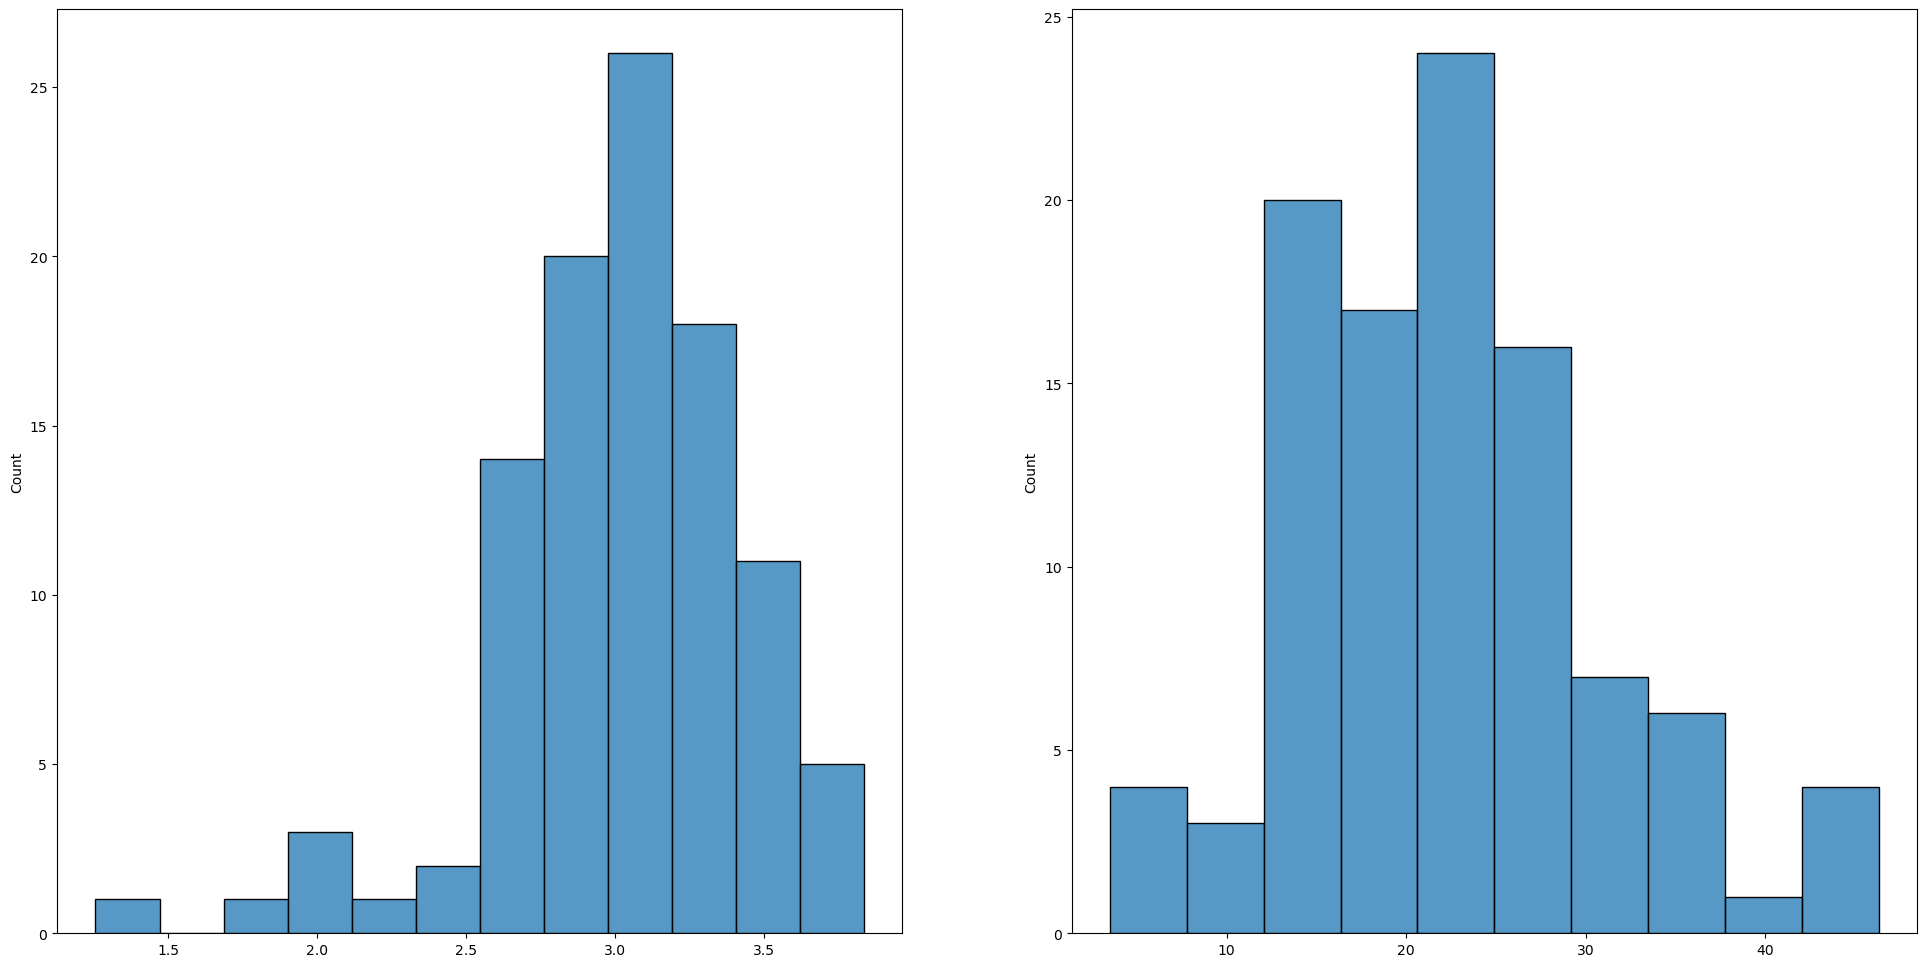

In [108]:
#plotting test prediction and, because it is in log scale, reverting it back to its original scale.
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0]);

sns.histplot(test_predictions_inverse_transformed, ax = ax[1]);

In [121]:
#Getting the coefficients and the intercept value to write the model equation.
coefficients = ols_res_0.params[1:]  # Exclude the intercept
intercept = ols_res_0.params[0]  # Intercept

print("Coefficients:","\n", coefficients)
print("Intercept:", intercept)

Coefficients: 
 CRIM       -0.127196
ZN          0.030795
INDUS       0.025248
CHAS        3.049477
NOX       -18.183246
RM          4.240098
AGE        -0.003594
DIS        -1.465507
RAD         0.239990
TAX        -0.011275
PTRATIO    -0.894845
LSTAT      -0.537770
dtype: float64
Intercept: 36.970469067030166


### **The final model equation**

**MEDV** = 36.97049 - 0.127196 * **CRIM** + 0.030795 * **ZN** + 0.025248 * **INDUS** + 3.049477 * **CHAS** - 18.183246 * **NOX** + 4.240098 * **RM** - 0.003594 * **AGE** - 1.465507 * **DIS** + 0.239990 * **RAD** - 0.011275 * **TAX** - 0.894845 * **PTRATIO** - 0.537770 * **LSTAT**

## Actionable Insights and Recommendations 

**High to medium impact variables in the final MEDV value**

- CHAS: Being located near the Charles River is associated with a predicted increase in MEDV by approximately $3,049 (in 1000 dollars), holding all other variables constant.

- RM: A one-unit increase in the average number of rooms per dwelling is associated with a predicted increase in MEDV by approximately $4,240 (in 1000 dollars), holding all other variables constant.

- DIS (weighted distances to five Boston employment centers): A one-unit increase in the weighted distances to employment centers is associated with a predicted decrease in MEDV by approximately $1,466 (in 1000 dollars), holding all other variables constant.

- PTRATIO: A one-unit increase in the pupil-teacher ratio is associated with a predicted decrease in MEDV by approximately $895 (in 1000 dollars), holding all other variables constant.

- LSTAT: A one-unit increase in the percentage of the lower-status population is associated with a predicted decrease in MEDV by approximately $538 (in 1000 dollars), holding all other variables constant.

**Low impact variables on the final MEDV value**

- CRIM: A one-unit increase in the per capita crime rate is associated with a predicted decrease in the median value of owner-occupied homes (MEDV) by approximately $127 (in 1000 dollars), holding all other variables constant.

- ZN (proportion of residential land zoned for lots over 25,000 sq.ft.): A one-unit increase in the proportion of residential land zoned for larger lots is associated with a predicted increase in MEDV by approximately $31 (in 1000 dollars), holding all other variables constant.

- INDUS: A one-unit increase in the proportion of non-retail business acres per town is associated with a predicted increase in MEDV by approximately $25 (in 1000 dollars), holding all other variables constant.

- AGE: A one-unit increase in the proportion of owner-occupied units built prior to 1940 is associated with a predicted decrease in MEDV by approximately $4 (in 1000 dollars), holding all other variables constant.

- RAD: A one-unit increase in the index of accessibility to radial highways is associated with a predicted increase in MEDV by approximately $240 (in 1000 dollars), holding all other variables constant.

- TAX: A one-unit increase in the property-tax rate is associated with a predicted decrease in MEDV by approximately $11 (in 1000 dollars), holding all other variables constant.


## **Final thoughts**

If there is a case of someone trying to find the best possible conditions to, for example, renovate a house in order to resell it and turn a provite, one should look at the variables CHAS and RM for significant increase in the property value and also DIS, PTRATIO and LSTAT in order to beware of possible devaluation of the property.

These insights could be very helpful in order to decide where to buy a property. Combined with the lower impact variables, the user of this model is well served with enough information based on the data provided to make an informed decision.